# 1. Mount GD and Set The Path






In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
ROOT = "/content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/Dataset"
IMG_PATH = ROOT + "//" + "Dataset//Images"
ATTR_PATH = ROOT + "//" + "list_attr_celeba.csv"
seed = 46

# 2. Setting Environment

In [ ]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 3. Data Cleaning

In [ ]:
attr_df = pd.read_csv(ATTR_PATH)
attr_df.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
attr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [ ]:
attr_df.index

RangeIndex(start=0, stop=202599, step=1)

In [ ]:
male_df = attr_df.loc[:, ["image_id", "Male"]]
male_df.head()

,image_id,Male
0,000001.jpg,-1
1,000002.jpg,-1
2,000003.jpg,1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
male_df.replace(-1, 0, inplace=True)

In [ ]:
male_df.head()

,image_id,Male
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,1
3,000004.jpg,0
4,000005.jpg,0


In [ ]:
male_df.describe()

,Male
count,202599.000000
mean,0.416754
std,0.493023
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
image_files = set(os.listdir(IMG_PATH))
filtered_Male_df = male_df[male_df['image_id'].isin(image_files)]

In [ ]:
filtered_Male_df.head()

,image_id,Male
50,000051.jpg,1
51,000052.jpg,1
64,000065.jpg,1
165,000166.jpg,1
197,000198.jpg,0


In [ ]:
print("Filtered image :", filtered_Male_df['Male'].count())

Filtered image : 5000


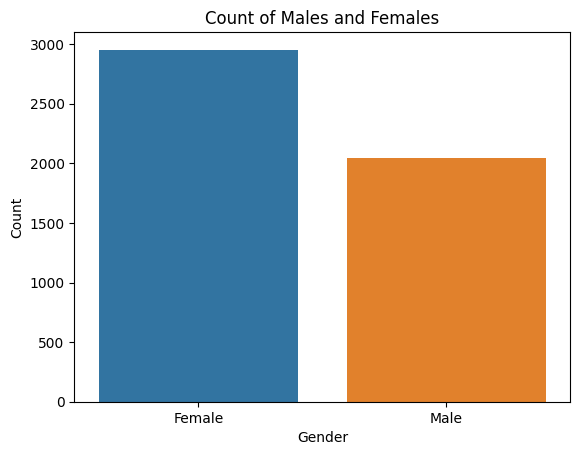

In [ ]:
# Create a new DataFrame to group data by gender and get the count
gender_count = filtered_Male_df.groupby('Male')['image_id'].count().reset_index(name='count')

# Create the bar graph
sns.barplot(x = 'Male', y = 'count', data=gender_count)

# Replace the numerical values 0 and 1 with 'Female' and 'Male' in the x-axis labels
plt.xticks([0, 1], ['Female', 'Male'])

# Add a title and labels
plt.title('Count of Males and Females')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the graph
plt.show()

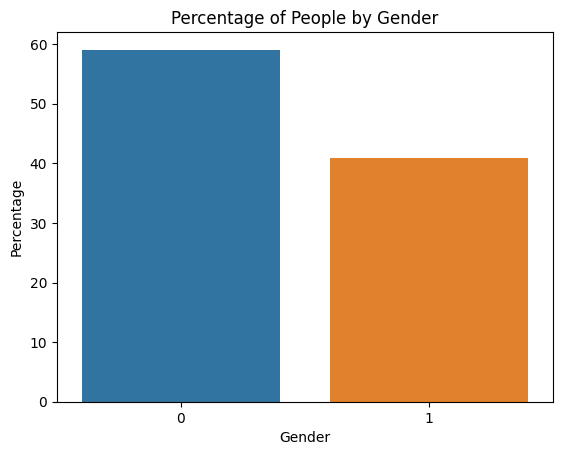

In [ ]:
# Count the number of people of each gender
gender_count = filtered_Male_df['Male'].value_counts()

# Calculate the percentage of people of each gender
gender_percentages = (gender_count / filtered_Male_df['Male'].count()) * 100

# Create a bar chart to visualize the percentages
sns.barplot(x=gender_percentages.index, y=gender_percentages.values)

# Add a title and labels to the chart
plt.title('Percentage of People by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')

# Show the chart
plt.show()

In [ ]:
# Create a dictionary to store the counts and percentages
gender_counts = {}

# Count the number of females and males
female_count = len(filtered_Male_df[filtered_Male_df['Male'] == 0])
male_count = len(filtered_Male_df[filtered_Male_df['Male'] == 1])

# Calculate the percentage of females and males
female_percentage = (female_count / len(filtered_Male_df)) * 100
male_percentage = (male_count / len(filtered_Male_df)) * 100

# Store the counts and percentages in the dictionary
gender_counts['Female'] = {'count': female_count, 'percentage': female_percentage}
gender_counts['Male'] = {'count': male_count, 'percentage': male_percentage}

# Print the gender counts and percentages
for gender in gender_counts:
    print(f"{gender}:")
    print(f"Count: {gender_counts[gender]['count']}")
    print(f"Percentage: {gender_counts[gender]['percentage']:.2f}%")

Female:
Count: 2953
Percentage: 59.06%
Male:
Count: 2047
Percentage: 40.94%


# 3. Data Loading and Balancing

In [ ]:
IMG_EXAM_1 = IMG_PATH + "//" + "000065.jpg"
IMG_EXAM_2 = IMG_PATH + "//" + "000065.jpg"

In [ ]:
# example of loading an image with the Keras API
from keras.preprocessing.image import load_img
# load the image
img = load_img(IMG_EXAM_1)
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
img.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(178, 218)


In [ ]:
# example of loading an image with the Keras API
from keras.preprocessing.image import load_img
# load the image
img = load_img(IMG_EXAM_2)
# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
# show the image
img.show()

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(178, 218)


In [ ]:
image = tf.keras.utils.load_img(IMG_EXAM_1)
input_arr = tf.keras.utils.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr.shape

(1, 218, 178, 3)

In [ ]:
from sklearn.model_selection import train_test_split

data = filtered_Male_df.copy(deep=True)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=seed)

In [ ]:
train_data['Male'] = train_data['Male'].astype(str)
test_data['Male'] = test_data['Male'].astype(str)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions and batch size
image_size = (218, 178)
batch_size = 32

# Create a data generator
datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values
    rotation_range=20,  # Data augmentation options (adjust as needed)
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=IMG_PATH,
    x_col='image_id',
    y_col='Male',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training',
    seed=seed,
    shuffle=True  # Shuffle the training data
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=IMG_PATH,
    x_col='image_id',
    y_col='Male',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    seed=seed
)

test_generator = datagen.flow_from_dataframe(
    dataframe=test_data,
    directory=IMG_PATH,
    x_col='image_id',
    y_col='Male',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False  # Don't shuffle the test data
)

Found 3200 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [ ]:
# Load an example image
img = load_img(IMG_EXAM_2)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Create a 3x3 grid for augmented images
plt.figure(figsize=(10, 10))

for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    batch = next(datagen.flow(x, batch_size=1))
    imgplot = plt.imshow(array_to_img(batch[0]))
    ax.axis('off')

plt.show()

In [ ]:
class_labels = train_generator.class_indices
print("Class labels in train generator:", class_labels)

Class labels in train generator: {'0': 0, '1': 1}


# 5. [Disclaimer] Model example

## A. VGG19

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load the VGG19 pre-trained model (excluding top layers)
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(218, 178, 3))

# Create a custom top model for binary classification
model_vgg19 = models.Sequential()
model_vgg19.add(base_model_vgg19)
model_vgg19.add(layers.Flatten())
model_vgg19.add(layers.Dense(256, activation='relu'))
model_vgg19.add(layers.Dropout(0.5))
model_vgg19.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_vgg19.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])




In [ ]:
# Train the model
history1 = model_vgg19.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 148s 621ms/step - loss: 0.6897 - accuracy: 0.5688 - val_loss: 0.6620 - val_accuracy: 0.5738
Epoch 2/10
100/100 [==============================] - 62s 622ms/step - loss: 0.4671 - accuracy: 0.7706 - val_loss: 0.3070 - val_accuracy: 0.8712
Epoch 3/10
100/100 [==============================] - 62s 623ms/step - loss: 0.2328 - accuracy: 0.9019 - val_loss: 0.1507 - val_accuracy: 0.9488
Epoch 4/10
100/100 [==============================] - 64s 638ms/step - loss: 0.1661 - accuracy: 0.9309 - val_loss: 0.1736 - val_accuracy: 0.9225
Epoch 5/10
100/100 [==============================] - 63s 630ms/step - loss: 0.1317 - accuracy: 0.9472 - val_loss: 0.1293 - val_accuracy: 0.9575
Epoch 6/10
100/100 [==============================] - 63s 628ms/step - loss: 0.1126 - accuracy: 0.9550 - val_loss: 0.1674 - val_accuracy: 0.9525
Epoch 7/10
100/100 [==============================] - 72s 714ms/step - loss: 0.1181 - accuracy: 0.9584 - val_loss: 0.1215 - val_a

In [ ]:
# model.save(os.path.join(vgg19_dir, "vgg19_model_v1.h5"))

## B. ResNet101

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load the ResNet-101 pre-trained model (excluding top layers)
base_model_resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(218, 178, 3))

# Create a custom top model for binary classification
model_resnet101 = models.Sequential()
model_resnet101.add(base_model_resnet101)
model_resnet101.add(layers.Flatten())
model_resnet101.add(layers.Dense(256, activation='relu'))
model_resnet101.add(layers.Dropout(0.5))
model_resnet101.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_resnet101.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


171446536/171446536 [==============================] - 5s 0us/step


In [ ]:
# Train the model
history2 = model_resnet101.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 135s 702ms/step - loss: 0.4510 - accuracy: 0.8781 - val_loss: 3.1812 - val_accuracy: 0.4338
Epoch 2/10
100/100 [==============================] - 66s 662ms/step - loss: 0.1465 - accuracy: 0.9475 - val_loss: 1.1765 - val_accuracy: 0.4325
Epoch 3/10
100/100 [==============================] - 69s 690ms/step - loss: 0.1149 - accuracy: 0.9613 - val_loss: 0.7290 - val_accuracy: 0.4750
Epoch 4/10
100/100 [==============================] - 69s 686ms/step - loss: 0.0792 - accuracy: 0.9709 - val_loss: 9.2215 - val_accuracy: 0.4325
Epoch 5/10
100/100 [==============================] - 68s 676ms/step - loss: 0.0695 - accuracy: 0.9744 - val_loss: 2.7153 - val_accuracy: 0.4538
Epoch 6/10
100/100 [==============================] - 68s 676ms/step - loss: 0.0489 - accuracy: 0.9803 - val_loss: 0.7727 - val_accuracy: 0.7150
Epoch 7/10
100/100 [==============================] - 67s 671ms/step - loss: 0.0545 - accuracy: 0.9803 - val_loss: 0.4259 - val_a

In [ ]:
# model.save(os.path.join(resnet101_dir, "resnet101_model_v1.h5"))

## C. VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load the VGG16 pre-trained model (excluding top layers)
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(218, 178, 3))

# Create a custom top model for binary classification
model_vgg16 = models.Sequential()
model_vgg16.add(base_model_vgg16)
model_vgg16.add(layers.Flatten())
model_vgg16.add(layers.Dense(256, activation='relu'))
model_vgg16.add(layers.Dropout(0.5))
model_vgg16.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_vgg16.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 1s 0us/step


In [ ]:
# Train the model
history3 = model_vgg16.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 66s 608ms/step - loss: 0.6903 - accuracy: 0.5766 - val_loss: 0.6762 - val_accuracy: 0.5663
Epoch 2/10
100/100 [==============================] - 63s 624ms/step - loss: 0.6007 - accuracy: 0.6606 - val_loss: 0.4736 - val_accuracy: 0.7725
Epoch 3/10
100/100 [==============================] - 61s 607ms/step - loss: 0.3262 - accuracy: 0.8537 - val_loss: 0.1852 - val_accuracy: 0.9225
Epoch 4/10
100/100 [==============================] - 61s 611ms/step - loss: 0.1892 - accuracy: 0.9209 - val_loss: 0.1386 - val_accuracy: 0.9538
Epoch 5/10
100/100 [==============================] - 61s 607ms/step - loss: 0.1544 - accuracy: 0.9416 - val_loss: 0.1326 - val_accuracy: 0.9575
Epoch 6/10
100/100 [==============================] - 61s 612ms/step - loss: 0.1170 - accuracy: 0.9556 - val_loss: 0.1954 - val_accuracy: 0.9388
Epoch 7/10
100/100 [==============================] - 61s 611ms/step - loss: 0.1185 - accuracy: 0.9547 - val_loss: 0.1292 - val_ac

In [ ]:
# model.save(os.path.join(vgg16_dir, "vgg16_model_v1.h5"))

## D. ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Load the ResNet-50 pre-trained model (excluding top layers)
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(218, 178, 3))

# Create a custom top model for binary classification
model_resnet50 = models.Sequential()
model_resnet50.add(base_model_resnet50)
model_resnet50.add(layers.Flatten())
model_resnet50.add(layers.Dense(256, activation='relu'))
model_resnet50.add(layers.Dropout(0.5))
model_resnet50.add(layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model_resnet50.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:

# Train the model
history4 = model_resnet50.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 89s 606ms/step - loss: 0.4191 - accuracy: 0.8684 - val_loss: 0.7154 - val_accuracy: 0.4325
Epoch 2/10
100/100 [==============================] - 60s 596ms/step - loss: 0.1467 - accuracy: 0.9434 - val_loss: 0.7434 - val_accuracy: 0.4238
Epoch 3/10
100/100 [==============================] - 61s 605ms/step - loss: 0.1272 - accuracy: 0.9553 - val_loss: 1.0187 - val_accuracy: 0.4375
Epoch 4/10
100/100 [==============================] - 61s 613ms/step - loss: 0.0919 - accuracy: 0.9681 - val_loss: 1.4636 - val_accuracy: 0.4450
Epoch 5/10
100/100 [==============================] - 61s 605ms/step - loss: 0.0691 - accuracy: 0.9719 - val_loss: 1.0109 - val_accuracy: 0.4462
Epoch 6/10
100/100 [==============================] - 62s 620ms/step - loss: 0.0547 - accuracy: 0.9775 - val_loss: 0.5074 - val_accuracy: 0.7462
Epoch 7/10
100/100 [==============================] - 60s 603ms/step - loss: 0.0457 - accuracy: 0.9834 - val_loss: 0.3763 - val_ac

In [ ]:
# model.save(os.path.join(resnet50_dir, "resnet50_model_v1.h5"))

## E. GoogleNet

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Load the InceptionV1 model from TensorFlow Hub with ImageNet weights
hub_model_url = "https://tfhub.dev/google/imagenet/inception_v1/classification/4"
base_model_googleNet = hub.KerasLayer(hub_model_url, trainable=False)

# Create a custom top model for binary classification
model_googleNet = tf.keras.Sequential([
    base_model_googleNet,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model_googleNet.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history5 = model_googleNet.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
100/100 [==============================] - 55s 507ms/step - loss: 0.4572 - accuracy: 0.8025 - val_loss: 0.3272 - val_accuracy: 0.8650
Epoch 2/10
100/100 [==============================] - 51s 514ms/step - loss: 0.3149 - accuracy: 0.8681 - val_loss: 0.2698 - val_accuracy: 0.8775
Epoch 3/10
100/100 [==============================] - 60s 605ms/step - loss: 0.2881 - accuracy: 0.8841 - val_loss: 0.2847 - val_accuracy: 0.8813
Epoch 4/10
100/100 [==============================] - 49s 492ms/step - loss: 0.2877 - accuracy: 0.8816 - val_loss: 0.2547 - val_accuracy: 0.8788
Epoch 5/10
100/100 [==============================] - 50s 500ms/step - loss: 0.2712 - accuracy: 0.8863 - val_loss: 0.2370 - val_accuracy: 0.9000
Epoch 6/10
100/100 [==============================] - 48s 484ms/step - loss: 0.2703 - accuracy: 0.8916 - val_loss: 0.2517 - val_accuracy: 0.8875
Epoch 7/10
100/100 [==============================] - 49s 488ms/step - loss: 0.2578 - accuracy: 0.9016 - val_loss: 0.2419 - val_ac

In [ ]:
# model.save(os.path.join(googlenet_dir, "googlenet_model_v1.h5"))

# 6. Plot the Training

In [ ]:
# Define a function to plot training history
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

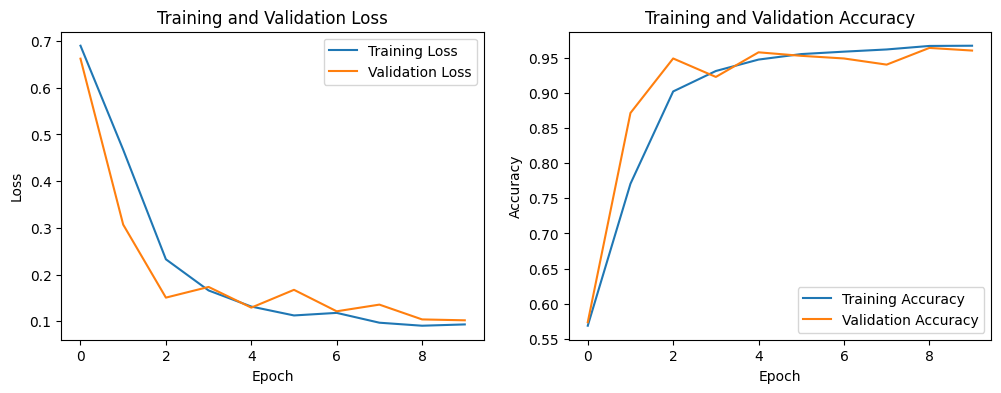

In [ ]:
# VGG19
plot_training_history(history1)

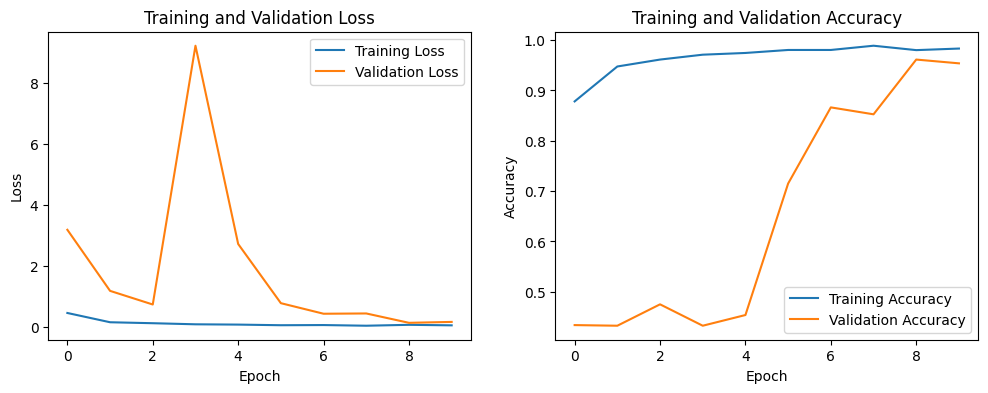

In [ ]:
# ResNet101
plot_training_history(history2)

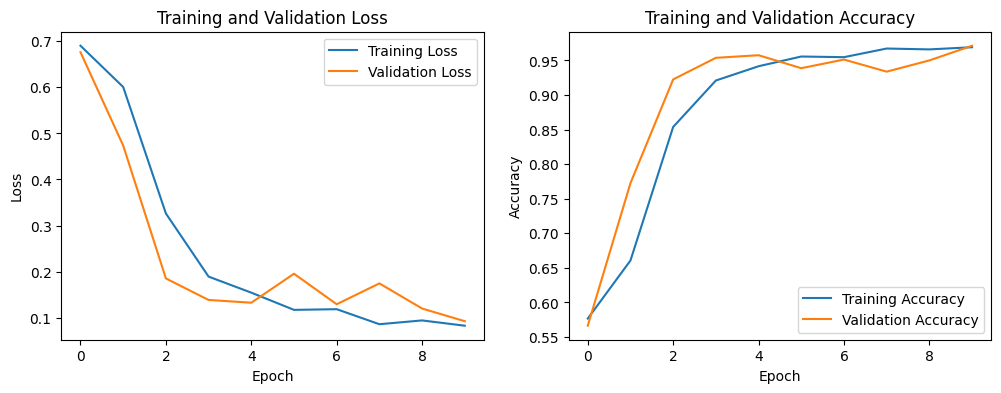

In [ ]:
# VGG16
plot_training_history(history3)

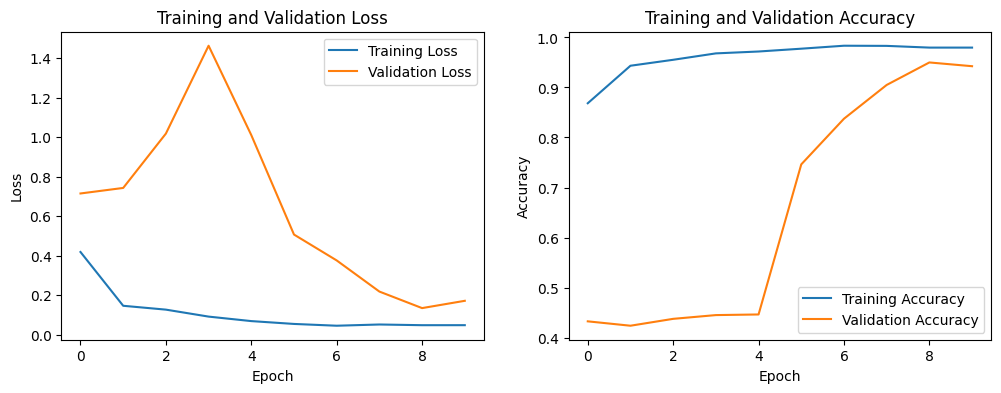

In [ ]:
# ResNet50
plot_training_history(history4)

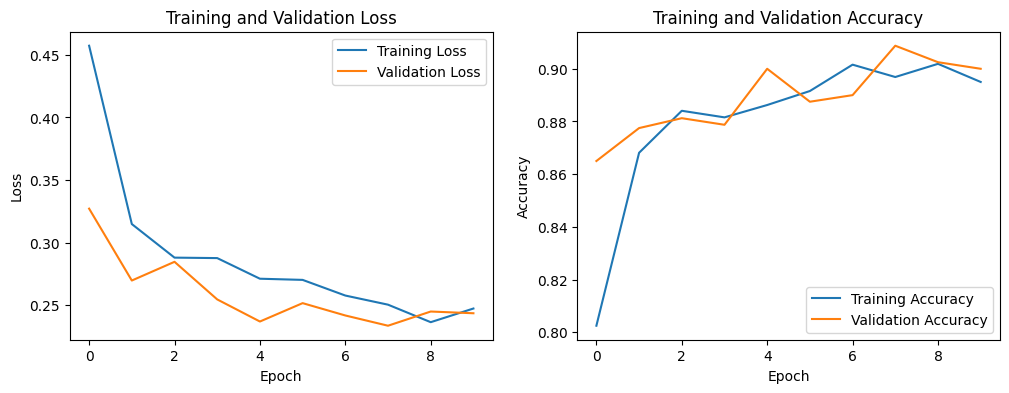

In [ ]:
# GoogleNet
plot_training_history(history5)

# 7. Save The Model

In [ ]:
import os

# Define the root directory
save_path = "/content/gdrive/MyDrive/IndonesiaAI/Project 1 - Face Recognition/save_model"

In [ ]:
# Save the trained VGG19 model
model_vgg19.save(os.path.join(save_path, "vgg19_model.h5"))

# Save the trained ResNet101 model
model_resnet101.save(os.path.join(save_path, "resnet101_model.h5"))

# Save the trained VGG16 model
model_vgg16.save(os.path.join(save_path, "vgg16_model.h5"))

# Save the trained ResNet50 model
model_resnet50.save(os.path.join(save_path, "resnet50_model.h5"))

# Save the trained GoogleNet/InceptionV1 model
model_googleNet.save(os.path.join(save_path, "googlenet_model.h5"))



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# 8. Model Evalutaion

In [ ]:
# Load The model

resnet50 = tf.keras.models.load_model(os.path.join(save_path, "resnet50_model.h5"))
vgg19 = tf.keras.models.load_model(os.path.join(save_path, "vgg19_model.h5"))
vgg16 = tf.keras.models.load_model(os.path.join(save_path, "vgg16_model.h5"))
resnet101 = tf.keras.models.load_model(os.path.join(save_path, "resnet101_model.h5"))

In [ ]:
loss, acc = resnet50.evaluate(test_generator, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

32/32 - 13s - loss: 0.1871 - accuracy: 0.9350 - 13s/epoch - 392ms/step
Restored model, accuracy: 93.50%


In [ ]:
def evaluate_model(model, test_generator):
    # Evaluate the model
    loss, accuracy = model.evaluate(test_generator, verbose=2)
    return accuracy

# Example of usage for each model
resnet50_accuracy = evaluate_model(resnet50, test_generator)
vgg19_accuracy = evaluate_model(vgg19, test_generator)
vgg16_accuracy = evaluate_model(vgg16, test_generator)
resnet101_accuracy = evaluate_model(resnet101, test_generator)
googlenet_accuracy = evaluate_model(model_googleNet, test_generator)

# Print the accuracies
print(f'ResNet50 - Accuracy: {100 * resnet50_accuracy:.2f}%')
print(f'VGG19 - Accuracy: {100 * vgg19_accuracy:.2f}%')
print(f'VGG16 - Accuracy: {100 * vgg16_accuracy:.2f}%')
print(f'ResNet101 - Accuracy: {100 * resnet101_accuracy:.2f}%')
print(f'GoogLeNet - Accuracy: {100 * googlenet_accuracy:.2f}%') # Not permanent, cause model can't be loaded

32/32 - 18s - loss: 0.1639 - accuracy: 0.9430 - 18s/epoch - 576ms/step
32/32 - 15s - loss: 0.1189 - accuracy: 0.9560 - 15s/epoch - 464ms/step
32/32 - 15s - loss: 0.1203 - accuracy: 0.9550 - 15s/epoch - 460ms/step
32/32 - 15s - loss: 0.1381 - accuracy: 0.9500 - 15s/epoch - 474ms/step
32/32 - 14s - loss: 0.2245 - accuracy: 0.9090 - 14s/epoch - 425ms/step
ResNet50 - Accuracy: 94.30%
VGG19 - Accuracy: 95.60%
VGG16 - Accuracy: 95.50%
ResNet101 - Accuracy: 95.00%
GoogLeNet - Accuracy: 90.90%


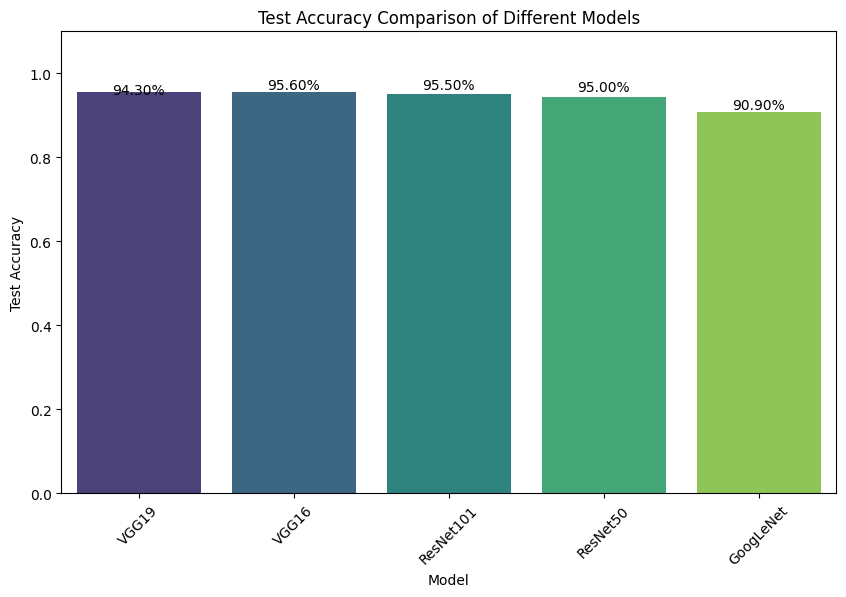

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the model names and their corresponding test accuracies
model_names = ["ResNet50", "VGG19", "VGG16", "ResNet101", "GoogLeNet"]
test_accuracies = [resnet50_accuracy, vgg19_accuracy, vgg16_accuracy, resnet101_accuracy, googlenet_accuracy]

# Create a dataframe for the data
import pandas as pd
data = pd.DataFrame({'Model': model_names, 'Test Accuracy': test_accuracies})

# Sort the data by test accuracy in descending order
data = data.sort_values(by='Test Accuracy', ascending=False)

# Create a bar plot to compare test accuracies
plt.figure(figsize=(10, 6))
plot = sns.barplot(x='Model', y='Test Accuracy', data=data, palette='viridis')
plt.title('Test Accuracy Comparison of Different Models')
plt.ylim(0, 1.1)  # Set the y-axis limit to represent accuracy in [0, 1]
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)

# Annotate the bars with accuracy values
for index, row in data.iterrows():
    plot.text(index, row['Test Accuracy'], f'{100 * row["Test Accuracy"]:.2f}%', ha='center', va='bottom')

plt.show()
